In [1]:
import pandas as pd
import numpy as np
import os
import json
import cv2
import random
import sklearn
import pydot
import tqdm
import datetime

from matplotlib import image as mpimg
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import yaml
import torch
from pathlib import Path
import random

import ultralytics
from ultralytics import YOLO

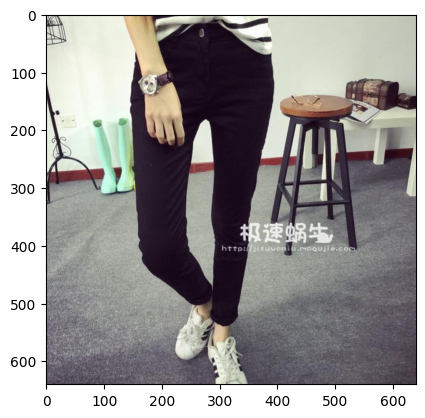

In [2]:
#Test if disk F: can be read
#If not please disconnect then reconnect Disk F:
img_id = "037711"

image = mpimg.imread(f"D:/Benji/deepfashion2_dataset/train/image/{img_id}.jpg")
plt.imshow(image)
plt.show()

In [3]:
# # Initialize Directory
# train_dir = "D:/Benji/deepfashion2_dataset_filter/train/pos/img"
# train_label = "D:/Benji/deepfashion2_dataset_filter/train/pos/label"
# val_dir = "D:/Benji/deepfashion2_dataset_filter/val/img"
# val_label = "D:/Benji/deepfashion2_dataset_filter/val/label"
# test_dir = "D:/Benji/deepfashion2_dataset_filter/test/"

In [4]:
ultralytics.checks()

Ultralytics YOLOv8.0.210  Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
Setup complete  (12 CPUs, 15.9 GB RAM, 295.0/446.5 GB disk)


In [5]:
model = YOLO('yolov8n.pt')
results = model.train(data='D:/Benji/yaml/deepfashion2.yaml', epochs=100, batch=32, patience=50, device=0, cls=0.4, dfl=0.7)

New https://pypi.org/project/ultralytics/8.0.215 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.210  Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/Benji/yaml/deepfashion2.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100      4.16G     0.8559     0.7894     0.5693         75        640: 100%|██████████| 4049/4049 [21:44<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.524      0.487      0.472      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/100      4.16G     0.8445      0.767     0.5657         71        640: 100%|██████████| 4049/4049 [22:29<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.513      0.501      0.477      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/100      4.16G     0.8383     0.7578     0.5634         51        640: 100%|██████████| 4049/4049

     27/100      4.16G     0.7887     0.6761     0.5459         66        640: 100%|██████████| 4049/4049 [22:54<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.433       0.57      0.507      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/100      4.16G     0.7861     0.6739     0.5456         67        640: 100%|██████████| 4049/4049 [22:22<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.446       0.56      0.506       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/100      4.16G     0.7851     0.6729     0.5449         83        640: 100%|██████████| 4049/4049 [22:36<00:00,
                 Class     Images  Instances      Box(P         

KeyboardInterrupt: 

In [ ]:
results = model.val(plots=True)